# Notebook 3 - EDA & Machine Learning Basics

Since we know how to read data and effectively clean (preprocess) them, now we are going to understand Machine Learning fundamentals and explore basic classifiers:
- exploratory data analysis (EDA)
- what is machine learning and what are the types of ML
- training & test dataset preparation and split
- Cross-Validation for effective use of the dataset
- how to measure real classifier performance
- explore fundamental classifiers using builtin `scikit-learn` datasets

This notebook is not directly focused on NLP, however, its content is very important and widely used in different NLP applications.

---

## 6. ML Basics

### 6.1 What is machine learning and how do machines learn?

According to Wikipedia, "Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data". Well, this definition seems quite broad and
it doesn't say much about this *mythical* learning process. However, since machines have been developed by humans, their way of learning may be similar to how we learn, right?

Yes, but not fully. Imagine being put in an unknown place on Earth. If you see that it is raining for 10 consecutive days at 10 am, it will be very likely for you that on the next day it will be also raining at 10 am. In this case, your prediction is based on the observation and identification of the regular *pattern*. However, for people, it is almost always insufficient to predict based on observation only. Besides observing, we also try to *deduct* WHY something happens and what is the mechanism behind certain phenomena. In this case, by taking other factors into account you could discover that rains are caused by high humidity and perhaps convection cycle.

What happens if a computer is given the task to predict when will be the next rainfall given that it was raining for 10 consecutive days at 10 am? The computer algorithm will try to detect and learn the *pattern* based on the given observation dataset (10-day rain history). After a successful learning process, it will be able to give predictions. So far, machine learning seems similar to human learning but here is the difference - machines will be able to recognize patterns only in the dataset they were given. The computer algorithm won't unexpectedly say: "Hello, 10-day rain history is cool but I think rain is related with something different, perhaps the geographical conditions". It will not say that because it doesn't even know that geographical conditions exist.

Now, imagine that the "raining hour" wasn't always 10 am - sometimes it started raining a little bit earlier, sometimes later. How does the computer learn that it should start raining *around* 10 am on the next day? Well, it depends on the learning algorithm implementation. For example, it may try to find the distribution of "raining hours" in the 24h period and decide what will be the boundary for determining when the rainfall takes place.

The expected outcome of the machine learning process is a function that maps an input to an output. In the case of rain prediction, it could be a function that given date and time outputs whether it will be raining or not. Examples:
- f(Monday 10am) = raining
- f(Sunday 9pm) = not raining

Machine learning often has two separate stages: 
- training, which consists of developing the most accurate mapping function using most of the dataset
- testing, which is taking a small, independent part of the dataset to estimate the performance of the model in an unbiased way

### 6.2 Supervised vs unsupervised learning

There are many ways in which machine learning can be classified. One of them is the classification based on the supervision of the learning process.

Supervised learning is the type of learning that uses labeled datasets to develop a function that maps from the data to the related label. A good example of this would be a classification algorithm for detecting spam. We could have a big set of manually marked text messages as spam or normal ones. While learning, the classification algorithm may adjust itself based on these labels (e.g. based on labels it knows that words “money” or “win” occur more often in spammy messages so the resulting function may classify messages containing both “money” and “win” as spam).

On the other hand, we have unsupervised learning which doesn’t use labels to learn how to classify. These models try to learn the inherent structure of the dataset. Comparing to the supervised spam detection model, an unsupervised model won’t have the power of labels and will not be able to match some specific features with a given label. Instead, it will try to represent all messages in a specific way, so it will be possible to identify some distinguishing properties and in the end - group them.

### 6.3 Bias and Variance

When developing a machine learning model two common problems may occur - **underfitting** and **overfitting**.
Underfitting means that the model isn't able to sufficiently identify the relation between input and output values. The common reasons for this are the model simplicity and too small a training set. On the other hand, overfitting is a situation when a model is too strongly related to a training set resulting in bad performance against unseen data. The perfect model will be ideally between these two situations, being able to generalize to unseen data well.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/under_over_fitting.png" width="700"/></div>


There are two important values, which may be responsible for both problems stated above.
The first one is **bias**, which is an error from erroneous assumptions in the learning algorithm. High bias - meaning wrong assumptions - may result in a model, that is not able to accurately relate input and output values causing underfitting.
The second value is **variance**. It is interpreted as an error from sensitivity to small fluctuations in the training set. A high variance may be produced by a model, that tries to model the random noise in the training data causing overfitting.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/bias_variance.png" width="300"/></div>

### 6.4 Datasets sources

There are three ways of getting a dataset. You can either collect data by yourself, you can use python package builtin datasets (`scikit-learn` comes with a variety of exemplary datasets) or you can use datasets available online. The first solution isn't simple, since gathering data is often related to getting access to non-public APIs, databases, or other resources and this takes a lot of time and effort. Exemplary datasets are great for learning and experimenting. However, there are already created datasets available online, which you can use without any cost. Of course, they may be messy and you will need to adjust them to your needs, but it is still a better choice since data has been already gathered. 

The most popular website with many publicly available datasets is [Kaggle](https://www.kaggle.com/).

### 6.5 EDA 

Datasets used for machine learning should follow a set of general and technical rules. More general ones:
- dataset should correspond to a type of ML task - datasets for classification will be different from those for regression
- when choosing a dataset, make sure it is a good representation of the environment (e.g. if you want to detect spam messages, your data set shouldn't contain only spam)
- if you want to create a universal model, try to make the dataset diverse as well 

Technical issues:
- many unnecessary columns in CSV files
- missing data
- duplicated data 
- invalid data


Let's see how to deal with these technical issues using a dataset containing medal-winning sportsmen and sportswomen info from Summer Olympic Games 2000-2016. (Modified data set from kaggle [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results))
Firstly, please familiarize yourself with this dataset!

In [49]:
import pandas as pd

#olympic_dataset_file = "https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/datasets/olympic.csv"

''' uncomment if you want to run it locally '''
olympic_dataset_file = "datasets/olympic.csv"

olympic_df = pd.read_csv(olympic_dataset_file)
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
1,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
2,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
3,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
4,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


#### Unnecessary columns

Sometimes the dataset contains more data than we actually need. One of the most common scenarios is that we get numbers of columns in CSV files but we want to use only a few of them. In this case for example, we don't need the "Games" series containing games names because we already have this info in the Year series. Also, since all games in this dataset were Summer Olympic Games, we can certainly remove the "Season" series. Let's see the stats for "Season" and remove redundant columns!

In [50]:
olympic_df.Season.value_counts()

Summer    10021
Name: Season, dtype: int64

As you can see there is only one type of Season and it is "Summer".

In [51]:
drop_list = ["Games", "Season"]
olympic_df.drop(drop_list, axis=1, inplace=True)  # inplace set to True tells pandas to make changes directly on the olympic_df
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
1,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
2,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
3,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
4,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


#### Missing data

Now, datasets often come with missing data. This means that there are incomplete entries with some fields left empty. Visually in pandas missing value is represented by `NaN`. Look at the first row in the olympic_df - the first entry does not have value in the "Weight" series. There may be more incomplete entries like this or in other series. Let's see how we can use pandas to detect it.

In [52]:
olympic_df[olympic_df.isna().any(axis=1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
177,2861,Nathon Allen,M,20.0,178.0,NaN,Jamaica,JAM,2016,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,Silver
324,5363,"Alexander Vladimirovich ""Sasha"" Artemev",M,22.0,168.0,NaN,United States,USA,2008,Beijing,Gymnastics,Gymnastics Men's Team All-Around,Bronze
609,9511,Daniel N'Dene Bekono,M,22.0,184.0,NaN,Cameroon,CMR,2000,Sydney,Football,Football Men's Football,Gold
935,14899,Karoline Charlotte Dyhre Breivang,F,28.0,172.0,NaN,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
936,14899,Karoline Charlotte Dyhre Breivang,F,32.0,172.0,NaN,Norway,NOR,2012,London,Handball,Handball Women's Handball,Gold
978,15459,Tore Brovold,M,38.0,175.0,NaN,Norway,NOR,2008,Beijing,Shooting,Shooting Men's Skeet,Silver
1035,16353,Diana Laura Bulimar,F,16.0,140.0,NaN,Romania,ROU,2012,London,Gymnastics,Gymnastics Women's Team All-Around,Bronze
1044,16445,Denis Bunti,M,29.0,NaN,NaN,Croatia,CRO,2012,London,Handball,Handball Men's Handball,Bronze
1159,17732,Luke Campbell,M,24.0,175.0,NaN,Great Britain,GBR,2012,London,Boxing,Boxing Men's Bantamweight,Gold


If we detect missing values in a field that interests us, we have several possible ways to deal with them. We may:
- remove whole entries
- replace them with the median of all entries
- replace them with the mean of all entries
- predict values using regression



In [53]:
# Removing
print("Row count before removal: {}".format(len(olympic_df)))
olympic_df_removed = olympic_df.dropna(axis=0, how='any')
print("Row count after removal: {}".format(len(olympic_df_removed)))

Row count before removal: 10021
Row count after removal: 9961


In [54]:
# Replacing with the mean
olympic_df_filled_mean = olympic_df
olympic_df_filled_mean.Weight.fillna(olympic_df.Weight.mean(), inplace=True)
olympic_df_filled_mean.Height.fillna(olympic_df.Height.mean(), inplace=True)

In this case we will remove all NaN entries:

In [55]:
olympic_df.dropna(axis=0, how='any', inplace=True)

#### Duplicated data

Now, we can easily detect and remove duplicates in the same way

In [56]:
olympic_df[olympic_df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
18,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
78,1131,Clarisse Agbegnenou,F,23.0,164.0,66.0,France,FRA,2016,Rio de Janeiro,Judo,Judo Women's Half-Middleweight,Silver
6859,96202,Valentina Vadimovna Popova,F,31.0,164.0,67.5,Russia,RUS,2004,Athina,Weightlifting,Weightlifting Women's Heavyweight,Bronze
8195,115059,Jovana Stevanovi,F,24.0,192.0,72.0,Serbia,SRB,2016,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver


In [57]:
olympic_df[olympic_df.Name == "Saeid Morad Abdevali"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
17,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
18,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze


In [58]:
olympic_df.drop_duplicates(keep="first", inplace=True)  # you can also set a 'subset' parameter to specify in which column you want to search for duplicates

#### Invalid data

The next important step before moving forward is data validation and cleaning. Accidental typos may happen in different stages of data collection but we don't want anyone with a height of 500cm or a "Bronz" medal as this may add harmful noise. Let's start by looking at the dataset summary for each series.

In [59]:
olympic_df.describe() # describes numerical data

,ID,Age,Height,Weight,Year
count,10017.000000,10017.000000,10017.000000,10017.000000,10017.000000
mean,70433.872317,26.167715,178.236490,81.218853,2007.991215
std,39457.881484,5.755885,11.787154,718.832016,5.659388
min,21.000000,15.000000,137.000000,28.000000,2000.000000
25%,36870.000000,23.000000,170.000000,62.000000,2004.000000
50%,70050.000000,26.000000,178.000000,72.000000,2008.000000
75%,105385.000000,29.000000,186.000000,84.000000,2012.000000
max,135563.000000,290.000000,219.000000,72000.000000,2016.000000


Now, it's clearly impossible to have 290 years or to weigh 72000 kg. To visualize it we can create box plots to see Age, Height and Weight distribution and their outliers.

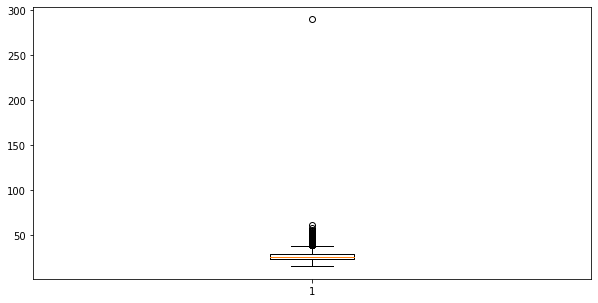

<Figure size 720x504 with 0 Axes>

In [61]:
from matplotlib import pyplot as plt
plt.boxplot(olympic_df.Age)
fig = plt.figure(figsize =(10, 7))
plt.show()

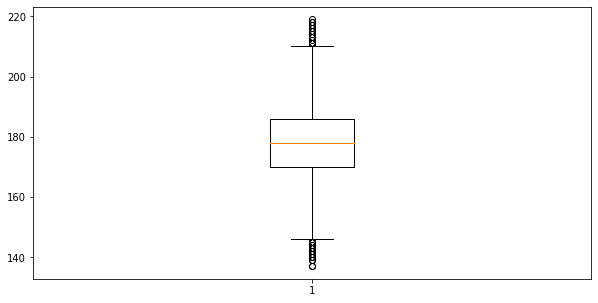

<Figure size 720x504 with 0 Axes>

In [62]:
plt.boxplot(olympic_df.Height)
fig = plt.figure(figsize =(10, 7))
plt.show()

Height seems to be fine - there is someone who is 219cm tall but that could be a basketball player, lets check

In [63]:
olympic_df[olympic_df.Height == 219]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
5984,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012,London,Volleyball,Volleyball Men's Volleyball,Gold


Ok Volleyball also makes sense - according to Wikipedia he is 2.18 but let's keep it this way. It is certainly not an error

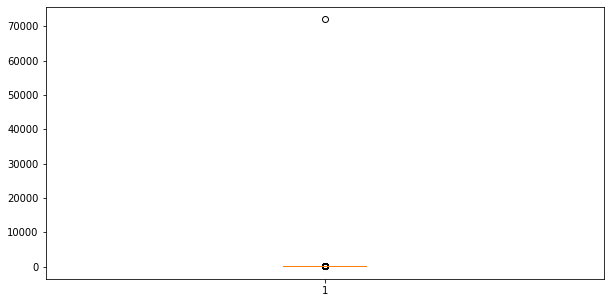

<Figure size 720x504 with 0 Axes>

In [64]:
plt.boxplot(olympic_df.Weight)
fig = plt.figure(figsize =(10, 7))
plt.show()

Ok we have identified our 2 outliers and can now either delete or correct them. Most likely the age is 29 and the weight 72 but let's just delete them.

In [68]:
invalid_olympic_df = olympic_df[((olympic_df.Age == 290) |(olympic_df['Weight'] == 7200))].index


In [70]:
olympic_df.drop(invalid_olympic_df)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,81.214924,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
1,62,Giovanni Abagnale,M,21.0,198.0,90.000000,Italy,ITA,2016,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
2,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.000000,Spain,ESP,2008,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
3,65,Patimat Abakarova,F,21.0,165.0,49.000000,Azerbaijan,AZE,2016,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
4,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.000000,Russia,RUS,2008,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016,135520,Julia Zwehl,F,28.0,167.0,60.000000,Germany,GER,2004,Athina,Hockey,Hockey Women's Hockey,Gold
10017,135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,23.0,189.0,80.000000,Netherlands,NED,2004,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
10018,135525,Martin Zwicker,M,29.0,175.0,64.000000,Germany,GER,2016,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze
10019,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.000000,Russia,RUS,2000,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


Ok, how about medal names of the string type?

In [71]:
olympic_df.Medal.value_counts()

Bronze     3448
Gold       3294
Silver     3272
Bronzee       1
Silber        1
Goldooo       1
Name: Medal, dtype: int64

In [72]:
correct_medal_names = ["Gold", "Silver", "Bronze"]
weird_medal_names = olympic_df[~olympic_df['Medal'].isin(correct_medal_names)]
weird_medal_names

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
2936,42280,Lorraine Graham (-Fenton),F,27.0,174.0,59.0,Jamaica,JAM,2000,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Silber
2947,42401,Sergey Yuryevich Grankin,M,27.0,195.0,96.0,Russia,RUS,2012,London,Volleyball,Volleyball Men's Volleyball,Goldooo
7701,107983,Coleman Lewis Scott,M,26.0,173.0,60.0,United States,USA,2012,London,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronzee


In [73]:
olympic_df.drop(index=weird_medal_names.index, inplace=True)

### 6.6 Dataset training-test split

#### Basic approach (training-test)
When we develop an ML model there are 2 main types of data subsets we need for each process:
1. **training set** - training the model
2. **test set** - testing the model 

The fundamental principle is to test models on previously unseen data. If we test a model using the same dataset that was used for training, it may end up being *overfitted* and behave artificially well, compared to the situation where it is given unseen data. This can thus introduce bias and cause huge inaccuracies in production. We want our evaluation procedure to be separated from the training set and the model development procedure. Moreover, we don't want to make any assumptions based on the evaluation process for how the model should behave.

So, how do we split the dataset into the **training set** and the **test set**? Since we need much more data for learning and only a small (but representative) part for testing, we often divide it into:
- 80% training
- 20% testing

Although this proportion is used very often, it is not a rule and it may differ for different models. 

#### Improved approach (training-validation)
During the model development, we choose a machine learning algorithm, that is most suitable for a given problem. Machine learning algorithms generally aren’t plug-and-play type - we must adjust algorithm parameters (called hyperparameters) or choose some specific algorithm behaviors. We do this because each problem is different and it must be approached in a specific way. 

When designing a machine learning model, especially a language processing one, it is important to know the data it will work with. Based on it, it is possible to tune algorithm parameters, so the algorithm may work better. So we need a representative set of samples, which we can use to tune model parameters. What are the possible options? 

 - Maybe we can use a test set since it is a good representation of the whole dataset and it still won't be used for training. Nevertheless, by doing so, the algorithm will get some insight into the test set and it may artificially inflate the model performance - **bad idea**.
 - The other solution is to create a separate set, called a **validation set** (or **dev set**) and use it to adjust model parameters. This, however, drastically reduces the number of samples used for training, and may result in a decreased performance - **better if much data, generally also bad idea**.
 - The solution is to use the test set (**validation set**) for fine tuning parameters and to assess the model using **Cross-Validation** (**CV**), which is a smart way of using the complete dataset for training and testing - discussed in the next section.

Let's see how we can use `scikit-learn` module to split data.

Let's say we want to create a model which based on age, height and weight tells us which Olympic medal should be given to the team member in the men's 4 x 100 metres Relay. Let's split the complete dataset into a separate DataFrame containing body properties (age, height, weight) and a separate DataFrame containing corresponding labels (type of the medal). Both DFs should contain only the men's 4 x 100 metres Relay entries. Body properties would be an input to the model, where the expected outcome would be a medal name label. Since this model is going to be a function, we will refer to body properties as **X**s and medal name labels as **y**s.

In [74]:
olympic_male_100mrelay = olympic_df[olympic_df['Event'] == "Athletics Men's 4 x 100 metres Relay"]
olympic_age_height_weight = olympic_male_100mrelay.iloc[:, 3:6]
olympic_medal = olympic_male_100mrelay["Medal"]

In [75]:
olympic_male_100mrelay.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
114,1561,Mobolade Abimbola Ajomale,M,20.0,180.0,62.0,Canada,CAN,2016,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
171,2760,Deji Aliu,M,28.0,187.0,75.0,Nigeria,NGR,2004,Athina,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
302,5150,Aaron Nigel Armstrong,M,30.0,173.0,70.0,Trinidad and Tobago,TTO,2008,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,Gold
330,5456,Nobuharu Asahara,M,36.0,179.0,76.0,Japan,JPN,2008,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
338,5561,Nickel Ashmeade,M,26.0,183.0,77.0,Jamaica,JAM,2016,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Gold


Now, let's **randomly** split data into training set and testing set.

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    olympic_age_height_weight, olympic_medal,
    test_size=0.2, random_state=0)  # random state is a seed for the shuffling function. If you don't want shuffling remove it and add "shuffle=False" parameter.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(55, 3) (55,)
(14, 3) (14,)


As you can see, the `train_test_split()` method automatically generated required subsets. However, let's take a closer look at how it works. By default, it generates subsets at random, which is not always the best solution since we want those subsets to be the best representations of the whole dataset (and real environment as well). 

The standard proportion for medals should be around 33:33:33 for bronze, silver, and gold so if you pick one sample at random, there is about the same chance for each medal.

But what happens if the proportion is something like 45:45:10? Imagine a situation where a great majority of samples labeled as "Gold" (medal) have been put in a test set. Because of this, the model may give inaccurate results since during training it has seen only a few gold medalists. In this case, we want both training and testing set to have the same proportions as the whole dataset (45:45:10).

Let's see how to achieve it using `stratify` parameter on a **slightly modified Olympic dataset**.

In [77]:
#olympic_low_gold_dataset_file = "https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/datasets/olympic_low_gold.csv"

''' uncomment if you want to run it locally '''
olympic_low_gold_dataset_file = "./datasets/olympic_low_gold.csv"

olympic_low_gold_df = pd.read_csv(olympic_low_gold_dataset_file)
olympic_low_gold_df['Medal'].value_counts()

olympic_low_gold_df['Medal'].value_counts(normalize=True)  # numbers sum up to 1

Bronze    0.504270
Silver    0.479535
Gold      0.016196
Name: Medal, dtype: float64

As you can see, gold medals are about 1.6% of all medals. We want to have the same proportion in both the training set and the test set.

In [78]:
olympic_age_height_weight_gold = olympic_low_gold_df.iloc[:, 3:6]
olympic_medal_gold = olympic_low_gold_df["Medal"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    olympic_age_height_weight_gold, olympic_medal_gold,
    test_size=0.2, stratify=olympic_medal_gold, random_state=0)  # stratify parameter takes an array of values to choose correct samples

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Bronze    0.504325
Silver    0.479477
Gold      0.016197
Name: Medal, dtype: float64
Bronze    0.504047
Silver    0.479765
Gold      0.016188
Name: Medal, dtype: float64


For comparison - here are the results if not stratified

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    olympic_age_height_weight_gold, olympic_medal_gold,
    test_size=0.2, random_state=0) 

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Bronze    0.506166
Silver    0.477453
Gold      0.016381
Name: Medal, dtype: float64
Bronze    0.496689
Silver    0.487859
Gold      0.015453
Name: Medal, dtype: float64


### 6.7 Cross validation

Cross Validation is a way to assess model performance. It is very helpful especially if you don't have a lot of data. The general idea of the CV is to train and test a model many times using the same complete dataset. 

CV works in the following way: We randomly split the dataset into training and a test set. Then we train our model using the training subset and evaluate it based on the test subset. Then we repeat the process n-times with different, randomly selected training and test sets. The error rate (model performance) can be calculated at the end as a mean value of all CV runs. Let's see how it works!

So, imagine this is our set which we want to use for CV.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_1.png" width="700"/></div>

Now, let's say we want to create 3 cross-validation splits over this dataset. How do we choose which samples go into which set? One way would be to randomly pick samples for sets:
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_2.png" width="700"/></div>

However, we may want each test set to be totally different from the previous one. In this case, we can use **K-fold cross-validation** iterator, which splits all data into K equally sized folds and for each of K iterations, treats one fold as a test set and all remaining K-1 folds as a training set. Let's see a 3-fold CV example.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_3.png" width="700"/></div>

A very common K-fold algorithm application is 10-fold cross validation.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_4.png" width="700"/></div>

Okay, but what happens if we have many classes in our dataset and use K-fold on them? 

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_7.png" width="700"/></div>

As you can see, groups created by the K-fold algorithm are often not representative in terms of the big dataset. For example, the testing set in the first iteration contains samples from only two classes, while the training set doesn't contain these classes at all! To guarantee that each set (training and test) will have the same proportions of classes, we can use **Stratified K-fold**. 

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/Figure_8.png" width="700"/></div>

Let's test it on our olympic dataset!


In [31]:
from sklearn.model_selection import KFold, StratifiedKFold

X = olympic_age_height_weight.to_numpy()
y = olympic_medal.to_numpy()

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X=X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68] TEST: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] TEST: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]


Ok, now we will see why StratifiedKFold may work better than regular KFold (especially on an unshuffled dataset). Firstly, let's develop a short function for telling us some set stats.

In [83]:
def show_set_counts(set_to_count):
    unique, counts = np.unique(set_to_count, return_counts=True)
    counts_normalized = counts/len(set_to_count)
    counts_dict = dict(zip(unique, counts_normalized))
    count_string = ""
    for key in counts_dict:
        count_string += "{}: {:.4f}%  ".format(key, counts_dict[key])
    print(count_string)

In [84]:
X = olympic_age_height_weight_gold.to_numpy()
y = olympic_medal_gold.to_numpy()

show_set_counts(y)
print()

# 10-fold CV
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X=X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    show_set_counts(y_test)   

Bronze: 0.5043%  Gold: 0.0162%  Silver: 0.4795%  

Bronze: 0.4162%  Gold: 0.1618%  Silver: 0.4221%  
Bronze: 0.5191%  Silver: 0.4809%  
Bronze: 0.4993%  Silver: 0.5007%  
Bronze: 0.5096%  Silver: 0.4904%  
Bronze: 0.4993%  Silver: 0.5007%  
Bronze: 0.5110%  Silver: 0.4890%  
Bronze: 0.5184%  Silver: 0.4816%  
Bronze: 0.5420%  Silver: 0.4580%  
Bronze: 0.5155%  Silver: 0.4845%  
Bronze: 0.5125%  Silver: 0.4875%  


As you can see, gold medals were present only in the first training fold. Quite bad, right? Let's use StratifiedKFold then.

In [85]:
X = olympic_age_height_weight_gold.to_numpy()
y = olympic_medal_gold.to_numpy()

show_set_counts(y)
print()

# Stratified 10-fold CV
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X=X, y=y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    show_set_counts(y_test)   

Bronze: 0.5043%  Gold: 0.0162%  Silver: 0.4795%  

Bronze: 0.5044%  Gold: 0.0162%  Silver: 0.4794%  
Bronze: 0.5044%  Gold: 0.0162%  Silver: 0.4794%  
Bronze: 0.5052%  Gold: 0.0162%  Silver: 0.4786%  
Bronze: 0.5052%  Gold: 0.0162%  Silver: 0.4786%  
Bronze: 0.5052%  Gold: 0.0162%  Silver: 0.4786%  
Bronze: 0.5037%  Gold: 0.0162%  Silver: 0.4801%  
Bronze: 0.5037%  Gold: 0.0162%  Silver: 0.4801%  
Bronze: 0.5037%  Gold: 0.0162%  Silver: 0.4801%  
Bronze: 0.5037%  Gold: 0.0162%  Silver: 0.4801%  
Bronze: 0.5037%  Gold: 0.0162%  Silver: 0.4801%  


### 6.8 Evaluation - accuracy, precision, recall

After training a model, we need a metric to understand how well (or not) it is doing. In the case of supervised learning we use labeled data, so we can compare the model outcome with the human-produced label, also called a **gold label**. Labels predicted by the model we will call **system labels**. 

Okay, let's say we create a spam detector that given a text, classifies it as spam or not. To measure the performance of such a model, we could create a simple metric that says what was a percentage of the correct guesses (where a system label is identical to to a gold label). This metric is called **accuracy** and is expressed as a ratio of the number of correctly predicted system labels to the total number of guesses.

 There are 4 possible situations:
- The message was indeed spam and the system classified it as spam (**true positive**)
- The message was indeed spam and the system classified it as not spam (**false negative**)
- The message was not spam and the system classified it as not spam (**true negative**)
- The message was not spam and the system classified it as spam (**false positive**)
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/pic1.png" width="500"/></div>

#### Accuracy
Using the terms above, **accuracy** is defined as the **percentage of correct predictions** for the test data. It can be calculated easily by dividing the number of correct predictions by the number of total predictions (the sum of true positives and true negatives divided by all samples). If we had a test set of 100 samples and the classifier got it 80 times correct, then the accuracy is 80%.

Now, this may seem unreasonable at first glance, but accuracy isn't the best metric, sometimes it's even totally meaningless. Imagine a model which detects tweets about `coffee` (binary decision: "tweet is about coffee" or "tweet is not about coffee"). Our test set should reflect the real conditions, where the great majority of tweets is NOT about coffee. Let's say our test set will contain 100,000 samples, from which only a small sample of tweets will be about coffee (1% or so). Now, what will be the accuracy of this model if it **doesn't work** and always says that a sample is "not about coffee"? Let's calculate it. We have 100,000 tweets in the test set:
- 1,000 tweets are about the coffee
- 99,000 tweets are not about the coffee

Since the model always says that a tweet is not about coffee we have 1,000 false negatives and 99,000 true negatives. The accuracy is 99,000 / 100,000, which is 99%! Wow - what a perfect model!


#### Precision, recall & F-measure
To detect situations like this there are two other metrics, which are used together to create a useful set of evaluation metrics. 
The first one is called **precision** - it expresses the ratio of true positives to everything system labeled as positive (true positives and false positives).
The other one is called **recall** - it expresses the ratio of true positives to all samples which were gold labeled as positive (true positives and false negatives).

Precision and recall are different from accuracy as they emphasize **true positives** - things we are supposed to be looking for.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/pic2.png" width="700"/></div>

There are ways of defining a single metric taking into account both precision and recall. One of the simplest combinations is called the **F-measure**. The beta parameter is used to make one metric more important than the other. Although it may be useful in many cases, the most popular value for beta is 1, where precision and recall are equally important.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook3/nb_resources/pic4.png" width="200"/></div>

Example of some metrics for a binary decision problem:

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# To give any sense to these numbers we can say these are gold labels for you spam detector. 1 means spam, 0 otherwise
y_true = np.array([1, 0, 1, 1, 0]) 

# This array will represent outcoming system labels
y_pred = np.array([0, 0, 0, 1, 0])

print("accuracy:", accuracy_score(y_true, y_pred))
print("precision:", precision_score(y_true, y_pred))
print("recall:", recall_score(y_true, y_pred))
print("f1 metric:", f1_score(y_true, y_pred))

accuracy: 0.6
precision: 1.0
recall: 0.3333333333333333
f1 metric: 0.5


Do you remember coffee tweet problem? Let's try to artificially create it and inspect metrics of that imaginary model, that classifies every tweet as "not about coffee".

In [37]:
# 100,000 samples, 99,000 not about coffee labeled with 0, 1,000 about coffee labeled with 1
y_true = np.zeros((100000,))

# Generate 1,000 indices for the y_true to be set to 1
from random import sample
coffee_indices = sample(range(100000), 1000)

for coffee_index in coffee_indices:
    y_true[coffee_index] = 1

unique, counts = np.unique(y_true, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 99000, 1.0: 1000}


Okay, now we have an array of 100,000 samples, from which only 1,000 "is about coffee". Our model always says that the sample is not about the coffee, so it will label all of them with 0.

In [38]:
y_pred = np.zeros((100000,))

Let's see model stats!

In [39]:
print("accuracy:", accuracy_score(y_true, y_pred))
print("precision:", precision_score(y_true, y_pred))
print("recall:", recall_score(y_true, y_pred))
print("f1 metric:", f1_score(y_true, y_pred))

accuracy: 0.99
precision: 0.0
recall: 0.0
f1 metric: 0.0


/home/lisanka/anaconda3/envs/ml2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we discussed earlier: although accuracy is fantastic, other metrics say that our model doesn't work at all (beacuse it doesn't!).

---

## 7. Classifiers

Classifiers are the name for a group of algorithms, that are used for developing models that classify data. In this context, classification means mapping some input to one of the possible outputs.
For example, we could use a classifier to determine whether the Men's 4 x 100 metres Relay Olympic medal should be given to a person based on their Age, Height, and Weight. The outcome of the classification would be "Yes" meaning a predicted medal or "No" for no medal (assuming we also had the data of all the participants who did not win a medal).
There are different types of classifiers used for different purposes. One way of describing classifiers is by determining whether they are **generative** or **discriminative**.
The difference between these two groups is in how they develop a way to correctly classify a sample.
- **Generative model** tries to understand for each class how the class representative looks like. In the case of Olympic data - what are the properties of the medalist and what are the properties of a person who didn't succeed in Olympic games. 
- On the other hand, the **discriminative model** tries to understand what are the differences between different classes - what is the difference between the medalist and non-medalist. In other words, this model has no clue what are the properties of the medalist, but it can tell you how the medalist is different from the non-medalist (perhaps they are higher and older).

Let's see an overview of the most fundamental classifiers and some code examples. In all examples, we will use the builtin Iris Dataset - more information [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). The purpose is to show you how easy it is to import different classifiers in scikit-learn and apply them on your data.

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Built-in dataset containing iris properties
X, y = load_iris(return_X_y=True)

# Firstly let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 7.1 Naive-Bayes (NB)
Naive-Bayes is a supervised learning probabilistic classifier. One of the most common applications of NB was spam detection. It is based on applying Bayes' probability theorem to the dataset - the occurrence of an event impacts the probability of another event. For example, spam messages contain a lot of certain words like "win" or "money" compared to normal messages. Then if the classifier sees a fresh message which also contains these words, there will be a high probability that this message is spam. Word "naive" is used to indicate the naive assumption of the conditional independence between samples' features (basically, it assumes there is no relation between word occurrences). Naive Bayes is a very fast classifier compared to Logistic Regression since it doesn't need to tune weights and parameters. Generally, because of the naive assumption, it is not used in serious applications, but sometimes (with smaller datasets) may work better than Logistic Regression.

We will see how it works in the next notebook.

Let's see how the Naive-Bayes algorithm can be implemented using `sklearn`.

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# Now we fit the classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# At the end we test it
y_pred = gnb.predict(X_test)

print(gnb.score(X_test, y_test))  # score using mean accuracy over all classes
print(f1_score(y_test, y_pred, average='macro'))

0.9666666666666667
0.9610256410256409


### 7.2 Logistic Regression 

Logistic regression is one of the most common classifiers (along with the NB). Logistic regression classifier develops a clever function that finds the dependency between input and output values. It uses a set of developed **features**, which are related with weights telling which feature is important for which class. Adjusting weights is done in a series of training and testing when the algorithm tries to find the best possible weights. Unlike the NB, this classifier requires a training stage, however, predicts generally better.

We will see how it works in the next notebook.

In [45]:
from sklearn.linear_model import LogisticRegression

# Now we train the classifier
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

# At the end we test it
y_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))  # score using mean accuracy over all classes
print(f1_score(y_test, y_pred, average='macro'))

0.8333333333333334
0.8225957049486462


### 7.3 Decision Tree

A Decision Tree is an algorithm, where the data is continuously split according to a certain parameter(s) - it is a simple decision-making model. Although Decision Trees are comfortable to inspect (since it is possible to simply plot the tree and see how it works), they are sensitive to variance and can be easily overfitted.

0.9666666666666667
0.9610256410256409


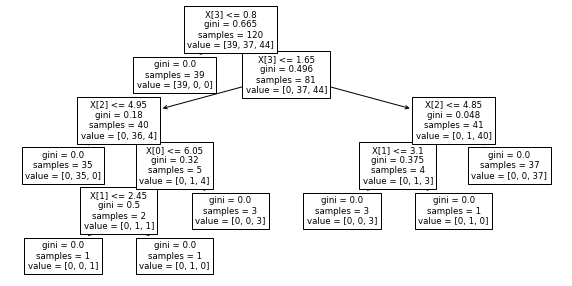

In [46]:
from sklearn import tree

tclf = tree.DecisionTreeClassifier()
tclf.fit(X_train, y_train)
tree.plot_tree(tclf) 

y_pred = tclf.predict(X_test)

print(tclf.score(X_test, y_test))  # score using mean accuracy over all classes
print(f1_score(y_test, y_pred, average='macro'))

### 7.4 Support Vector Machine (SVM)

The general principle of this classifier is to represent samples using points in multi-dimensional space. The classification is done by finding a hyperplane (line in 2d, plane in 3d, hyperplane in >3d), which separates all points in the best way. 

In [47]:
from sklearn.svm import SVC

clf = SVC(C=1.0) # C - SVM regularization parameter

clf.fit(X_train, y_train)

# At the end we test it
y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test))  # score using mean accuracy over all classes
print(f1_score(y_test, y_pred, average='macro'))

0.9666666666666667
0.9610256410256409


#### For each classifier you can specify multiple paramaters so it will work better with your unique dataset and task. If you want to explore them (I do encourage!) there is a complete documentation available on the `scikit-learn` website. Names below are clickable.
- [Naive-Bayes (NB)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)